Chi square test

In [1]:
import numpy as np
import seaborn as sns

# Generate a sample of 100 numbers from a standard normal distribution
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

In [2]:
sample1

array([-1.85074640e+00, -1.42946343e+00,  1.07375537e+00, -8.13641637e-01,
       -2.95908531e+00, -1.16112321e+00, -1.30664820e+00,  6.32895832e-01,
        8.89089948e-01, -2.08655630e-01,  9.91291573e-01,  1.57893230e+00,
        6.86453405e-01, -4.86870835e-01,  3.87953481e-01, -6.32328045e-01,
        1.07518774e-01,  5.02913427e-01, -5.75470878e-01, -7.73664237e-01,
        5.52769206e-01, -6.45945970e-01, -2.05371364e-01, -1.03091583e+00,
       -1.32684174e+00,  3.91277176e-01,  1.32998008e-01, -1.57729672e-01,
       -9.77048011e-04, -3.82312209e-01, -2.15520484e-01, -6.46219809e-01,
        3.40451425e-01, -5.57696718e-01,  5.05599770e-02, -6.79356493e-03,
       -2.14747366e-02,  3.49281175e-01,  4.43689076e-02, -6.87684030e-01,
       -8.87183496e-02, -5.28294141e-02, -1.10491147e+00, -7.05210222e-01,
        1.12610283e+00,  1.99751356e+00, -2.62592757e-01, -1.13256684e+00,
       -5.51462523e-01,  2.71661124e-01,  2.45714835e-01,  2.12570540e+00,
       -1.46636258e+00,  

<Axes: ylabel='Density'>

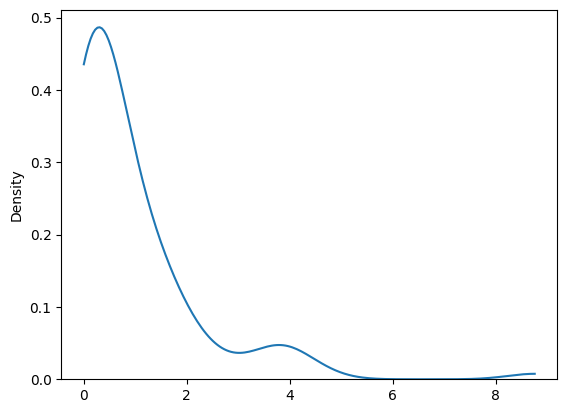

In [3]:
x = sample1**2

sns.kdeplot(x, clip=(x.min(),x.max()))

<Axes: ylabel='Density'>

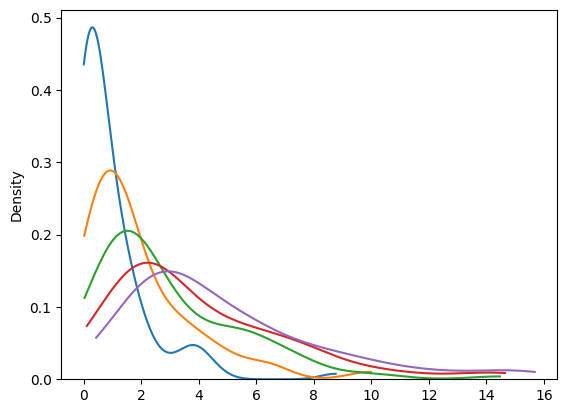

In [4]:
x = sample1**2
y = sample1**2 + sample2**2
z = sample1**2 + sample2**2 + sample3**2
u = sample1**2 + sample2**2 + sample3**2 + sample4**2
v = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

sns.kdeplot(x, clip=(x.min(),x.max()))
sns.kdeplot(y, clip=(y.min(),y.max()))
sns.kdeplot(z, clip=(z.min(),z.max()))
sns.kdeplot(u, clip=(u.min(),u.max()))
sns.kdeplot(v, clip=(v.min(),v.max()))

In [5]:
# calculate p value 

import scipy.stats as stats
test_statistics = 1 # chi square test statistics value
degrees_of_freedom = 5  # degrees of freedom (n-1)

# calculate the p_value using the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistics,degrees_of_freedom)

print('p_value:',p_value)

p_value: 0.9625657732472964


In [6]:
import pandas as pd 
import numpy as np 
from scipy.stats import chisquare 

# load the titanic dataset 
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# que p-class -> 1,2,3 mein passanger are equally probable 
# 3 category follw the uniform distribution

In [8]:
# count the passanger in each class 
class_counts = data['Pclass'].value_counts().sort_index()
class_counts

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [9]:
# calculate the expected counts assuming a uniform distribution 
total_passengers = len(data)
expected_counts = total_passengers / 3 
expected = [expected_counts] * 3
print("Expected passengers counts (assuming uniform distribution):\n",expected)

Expected passengers counts (assuming uniform distribution):
 [297.0, 297.0, 297.0]


In [10]:
# Perform the chi square goodness of fit test 
chi2, p_value = chisquare(class_counts,expected)

# print the results 
print("\nChi-square statistics: {:.2f}".format(chi2))
print("P_value : {:.4f}".format(p_value))


Chi-square statistics: 191.80
P_value : 0.0000


In [11]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")


We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


In [12]:
# we will use the chi square test for independent to see if the survival rate of passengers is independent of the passenger class

import pandas as pd 
import numpy as np 
from scipy.stats import chi2_contingency

# Load the titanic dataset 
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
contingency_table = pd.crosstab(data['Survived'],data['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [16]:
# perform the chi square test 
chi2, p_value , dof , expected = chi2_contingency(contingency_table)

# Print the results 
print("\nChi-square statistics: {:.2f}".format(chi2))
print("\nP_value: {:.4f}".format(p_value))
print("\nDegrees Of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected))


Chi-square statistics: 102.89

P_value: 0.0000

Degrees Of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [17]:
# Interpret the results 
alpha = 0.05
if p_value < alpha:
  print("\nWe reject the null hypothesis. There is significant association between passenger class and survival rate.")
else:
  print("\n We fail to reject null hypothesis. There is no significant association between passenger class and survival rate.")  


We reject the null hypothesis. There is significant association between passenger class and survival rate.
